MODEL           | TOP-1 | EPOCH
-------------------------------------------------
bs4_nhead8_nel6 | 0.19 | 95/100


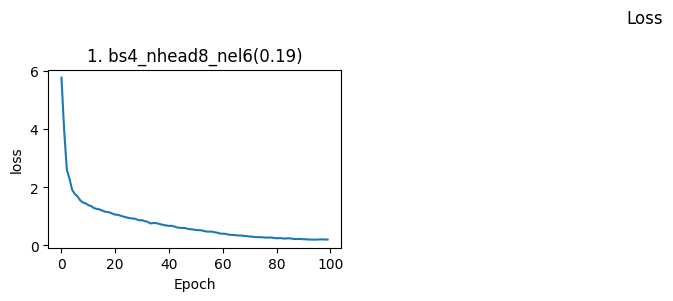

In [13]:
import matplotlib.pyplot as plt
import os
import torch

models = [
    'bs4_nhead8_nel6',
    # 'bs16_hs10_nl10',
    # 'bs4_hs100_nl10',
    # 'bs16_hs100_nl10',
    # 'bs32_hs100_nl100',
    # 'bs64_hs100_nl100',
]

max_len_models = max(len(m) for m in models)
root = "/home/rtlink/robros/log/Transformer"

loss_dict = {}
name_list = []

print(f'{"MODEL":<{max_len_models}} | TOP-1 | EPOCH')
print("-------------------------------------------------")
for model in models:
    filename = os.path.join(root, model, 'ckpt.pt')
    name_list.append(model)
    if not os.path.exists(filename):
        continue

    ckpt = torch.load(filename)
    loss_list = torch.tensor(ckpt['loss_list'])
    min_loss = loss_list.min()
    at = loss_list.argmin()+1
    current_epoch = len(loss_list)

    loss_dict[model] = loss_list

    print(f'{model:<{max_len_models}} | {min_loss:.2f} | {at:d}/{current_epoch:d}', flush=True)

plt.figure(figsize=(13, 5))
model = models[0]
for i, model in enumerate(models, start=1):
    name = model.split('.')[0]
    loss_list = loss_dict[model]
    loss = min(loss_list)

    ax = plt.subplot(2,4,i)
    ax.set_title(f'{i}. {name}({loss:.2f})')
    ax.plot(loss_dict[model])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')

plt.suptitle('Loss')
plt.tight_layout()
plt.show()